<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [5]:
import pandas as pd

Load the dataset into a dataframe.


In [6]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [9]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


/var/folders/xy/dg4l32h90q314hj4jzk1nwsc0000gn/T/ipykernel_35152/908747154.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['ConvertedComp'], shade=True)


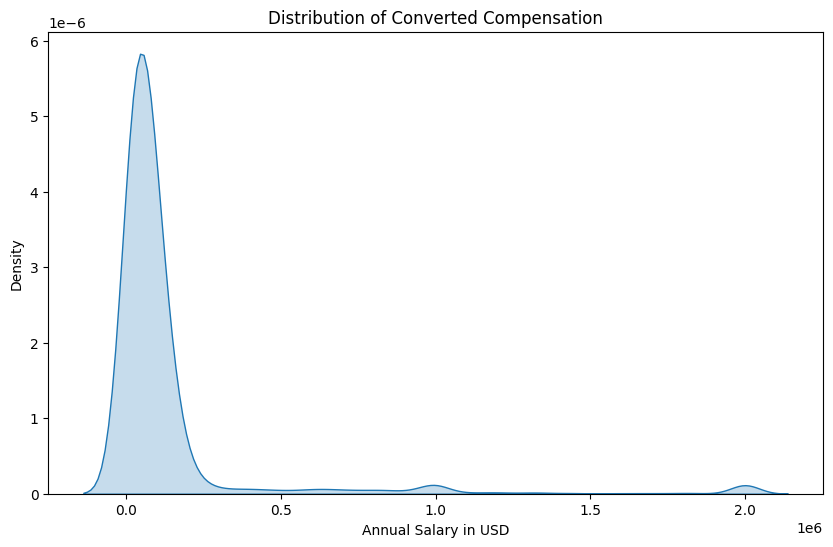

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution curve for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))
sns.kdeplot(df['ConvertedComp'], shade=True)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Annual Salary in USD')
plt.ylabel('Density')
plt.show()

Plot the histogram for the column `ConvertedComp`.


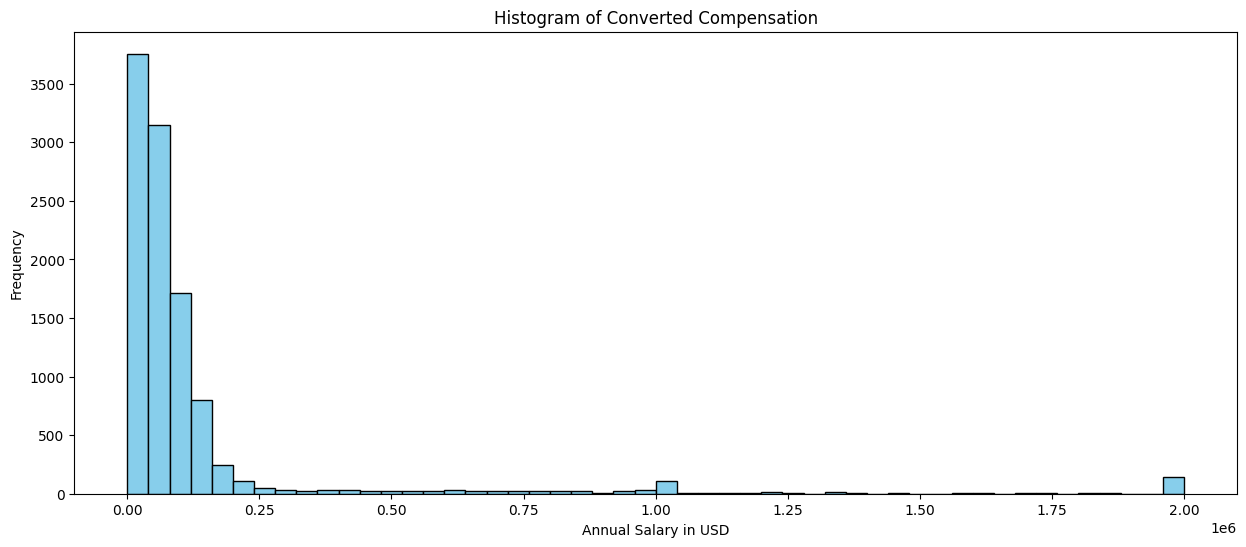

In [31]:
# Plotting the histogram for the 'ConvertedComp' column
plt.figure(figsize=(15, 6))
plt.hist(df['ConvertedComp'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Annual Salary in USD')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [19]:
# Calculating the median of the 'ConvertedComp' column
converted_comp_median = df['ConvertedComp'].median()
converted_comp_median

57745.0

How many responders identified themselves only as a **Man**?


In [20]:
# Counting how many responders identified themselves only as a man
man_responders_count = df[df['Gender'] == 'Man'].shape[0]
man_responders_count

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [21]:
# Finding the median ConvertedComp of responders identified themselves only as a woman
woman_median_converted_comp = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
woman_median_converted_comp

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [22]:
# Providing the five number summary for the 'Age' column
age_five_number_summary = df['Age'].describe(percentiles=[.25, .5, .75])
age_five_number_summary = age_five_number_summary[['min', '25%', '50%', '75%', 'max']]
age_five_number_summary

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


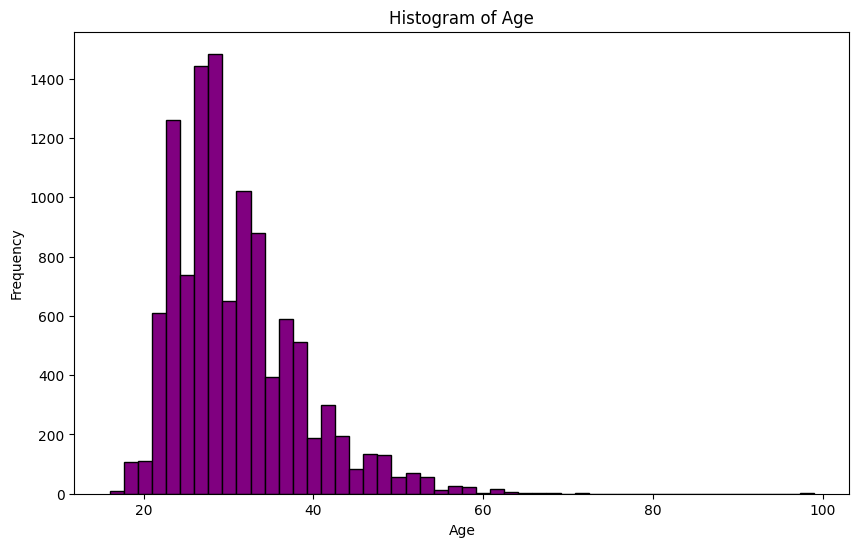

In [17]:
# Plotting the histogram of the 'Age' column
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=50, color='purple', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [18]:
converted_comp_median, man_responders_count, woman_median_converted_comp, age_five_number_summary


(57745.0,
 10480,
 57708.0,
 min    16.0
 25%    25.0
 50%    29.0
 75%    35.0
 max    99.0
 Name: Age, dtype: float64)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [ ]:
# your code goes here


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [ ]:
# your code goes here


Find out the upper and lower bounds.


In [ ]:
# your code goes here


Identify how many outliers are there in the `ConvertedComp` column.


In [ ]:
# your code goes here


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [ ]:
# your code goes here


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [ ]:
# your code goes here


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
